In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Emincan\Desktop\Dojo-Projects-Local\DATA\Blood Transfusion Service Center\transfusion.data.csv')

target_col = 'whether he/she donated blood in   March 2007'


print(f"DF shape :{df.shape}")

df.head()

DF shape :(748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
new_names = {
    'whether he/she donated blood in March 2007': 'March Blood Donate',
}

df = df.rename(columns=new_names)

target_col = 'March Blood Donate'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   March Blood Donate     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
num_cols = df.select_dtypes(exclude=['object','category']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

In [6]:
# Total Summary

def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    
check_data(df, 'Train data')
print('-'*100)
# check_data(df_test, 'Test data')
# print('-'*100)
# check_data(original, 'Original data')

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
Unique Value Count,31,33,33,78,2


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


In [7]:
class CFG:
    """
    Purpose of the Class:
    - Transforming the feature engineering stage into an open-close format to reduce bugs
    - Expand/demonstrate the scope of tested features in the final solution, even if some features are not present.
    """
    
    target_col = 'March Blood Donate'
    
    pass

# Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split

df_train , df_test = train_test_split(df, test_size=0.2, random_state=34 , stratify=df[target_col])

# EDA

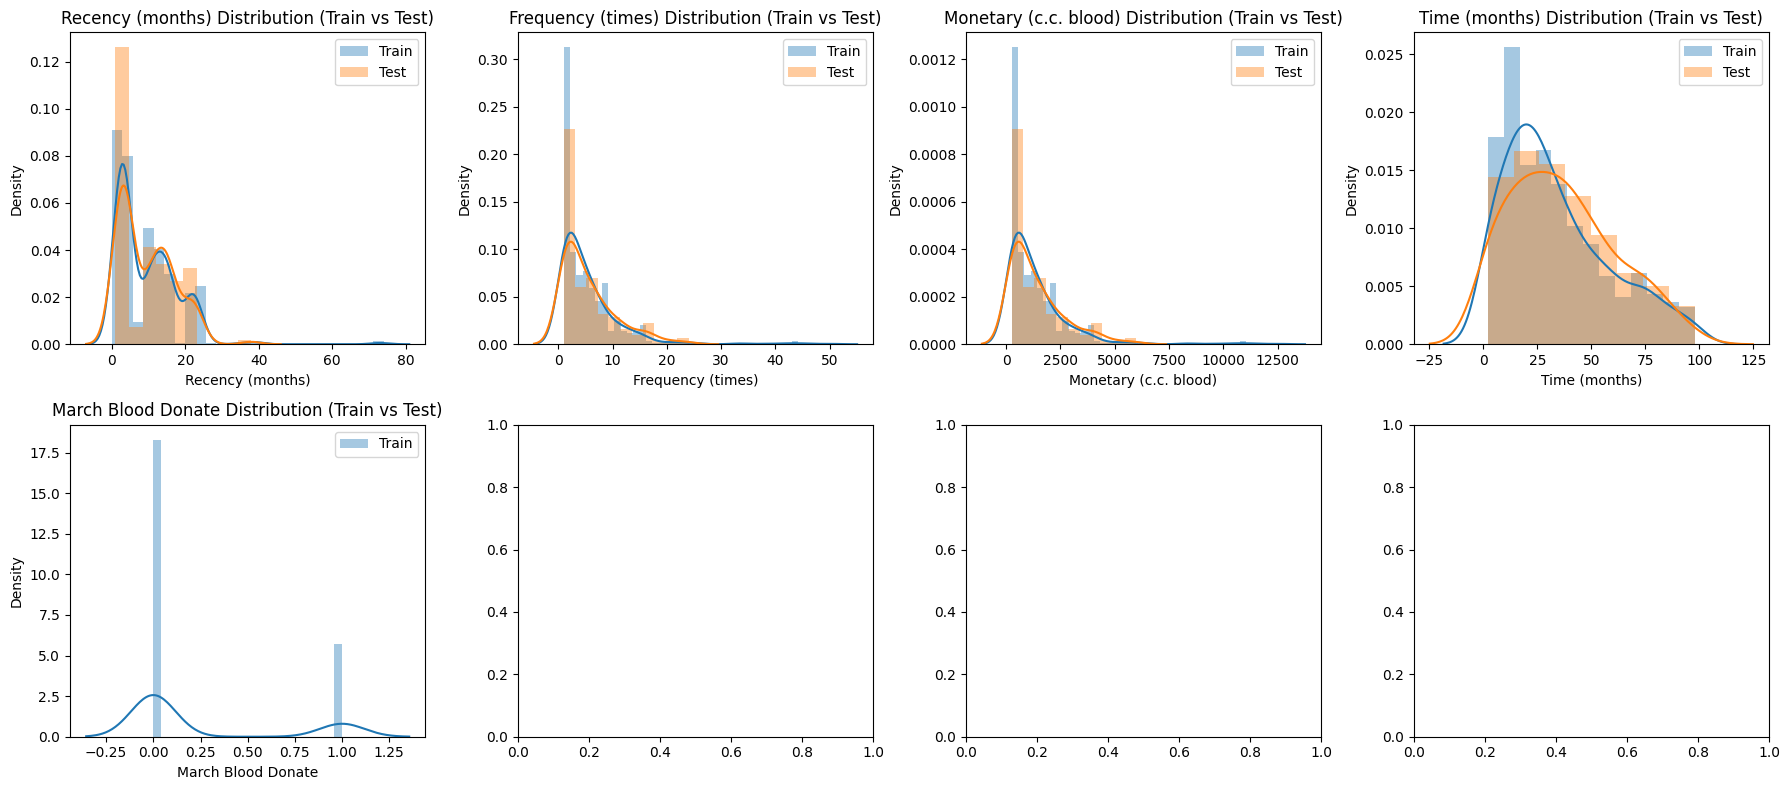

In [9]:
import warnings
warnings.filterwarnings("ignore")

def plot_histograms(df_train, df_test, target_col, n_cols=3):
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()
    plt.show()

plot_histograms(df_train[num_cols], df_test[num_cols], target_col, n_cols=4)

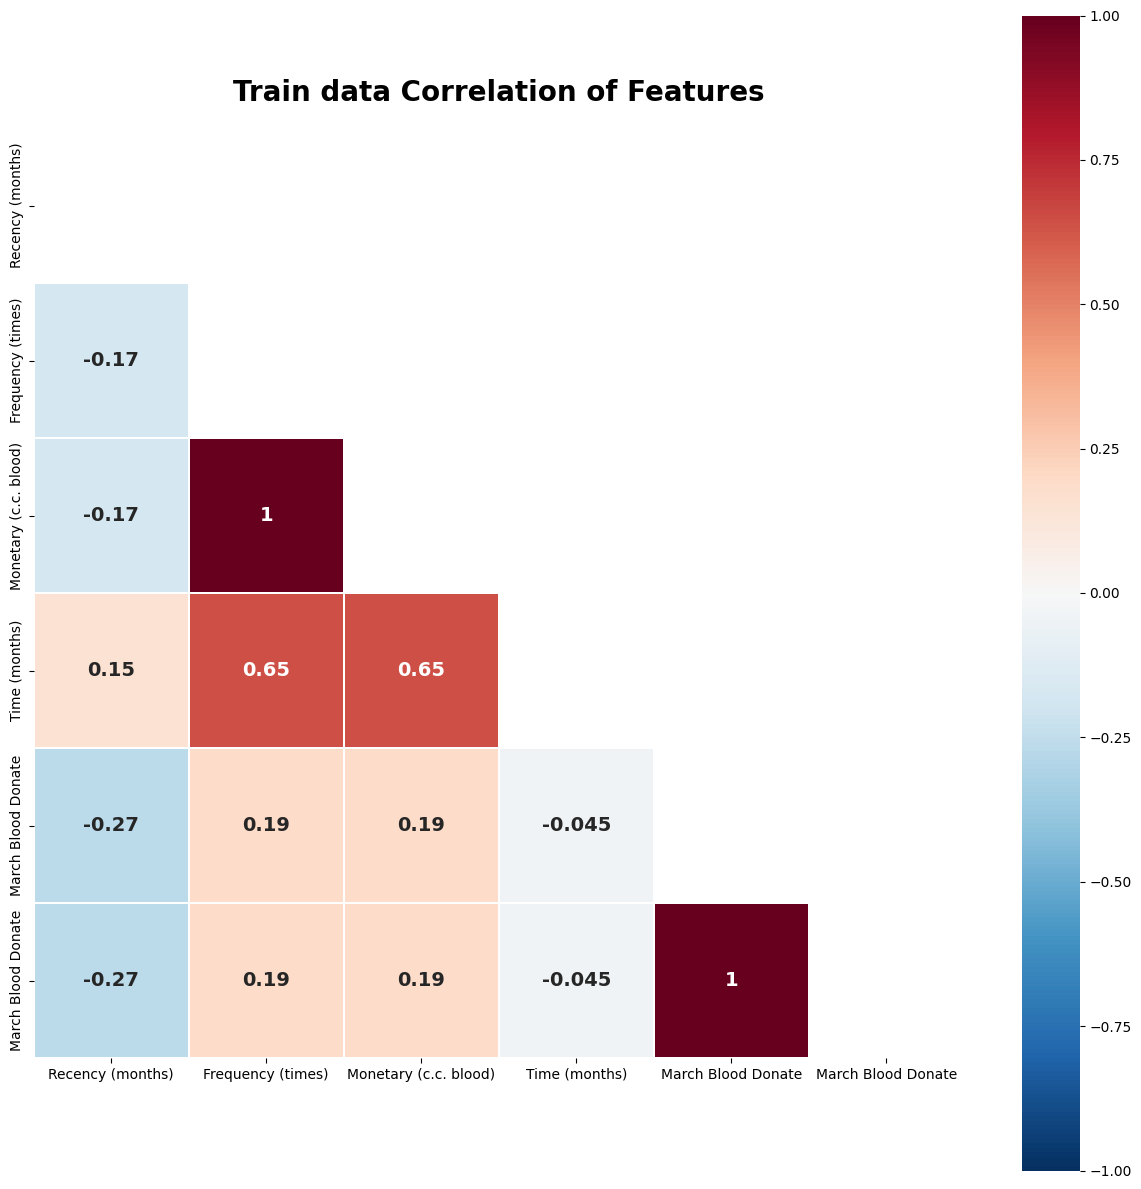

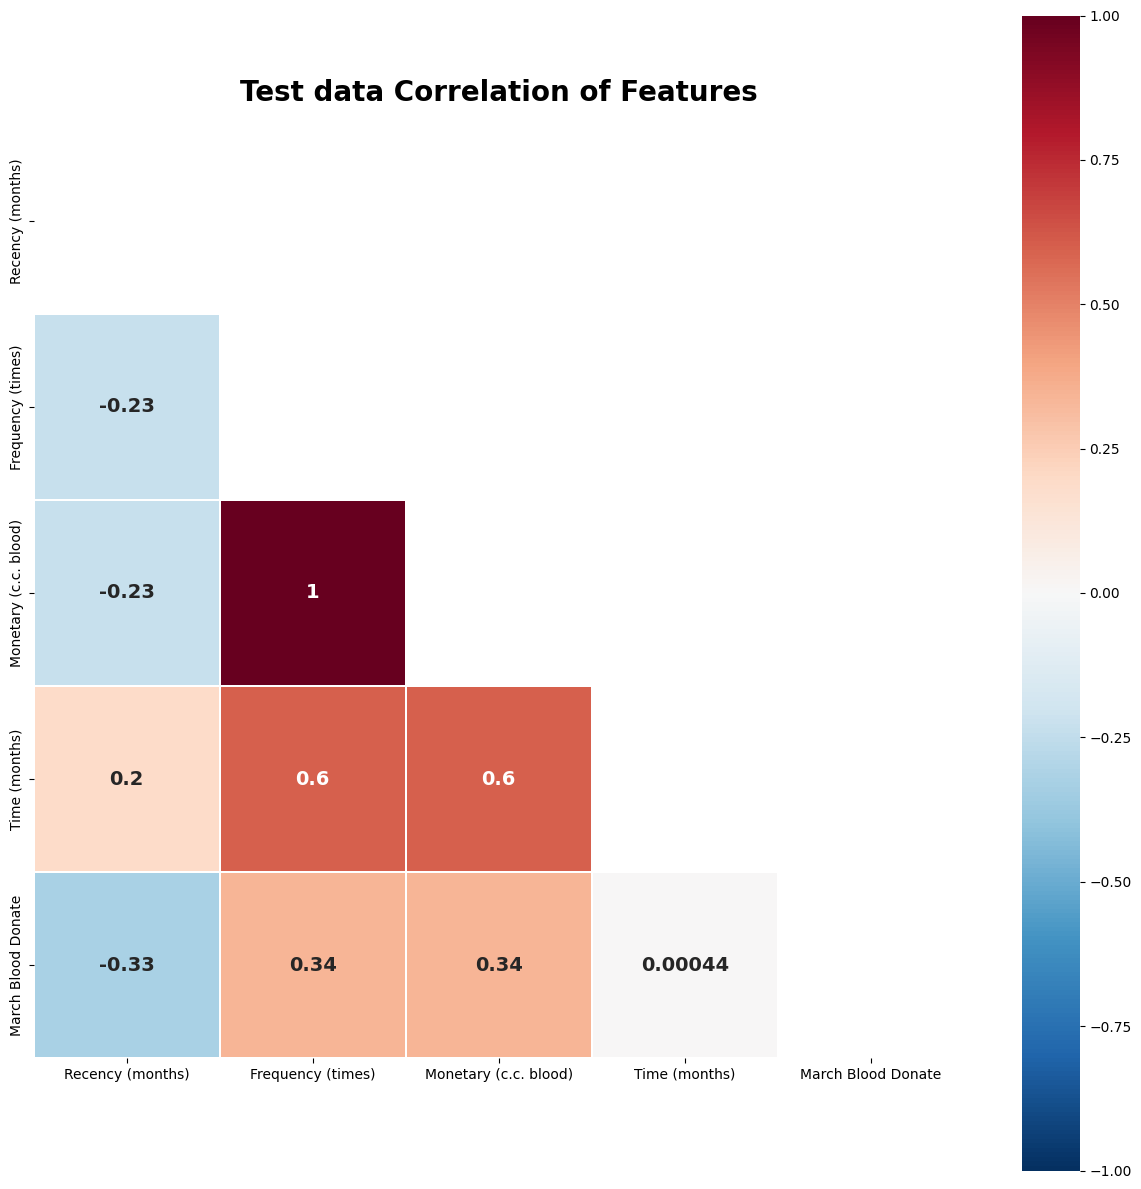

In [10]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(df_train[num_cols+[target_col]], title='Train data')
plot_heatmap(df_test[num_cols], title='Test data')
# plot_heatmap(original[num_cols+[target_col]], title='original')

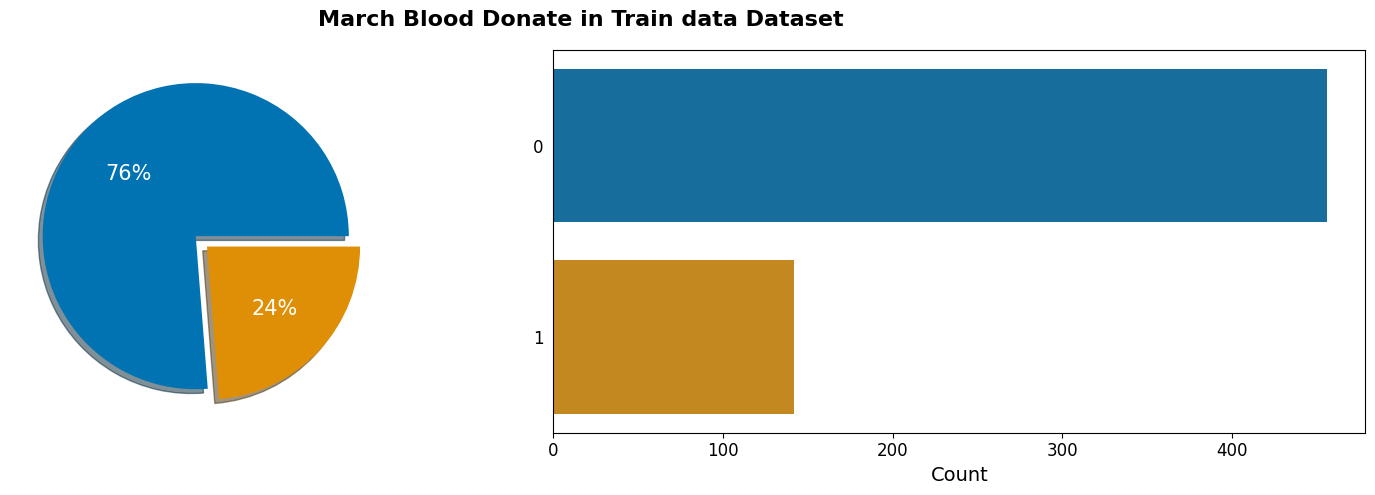

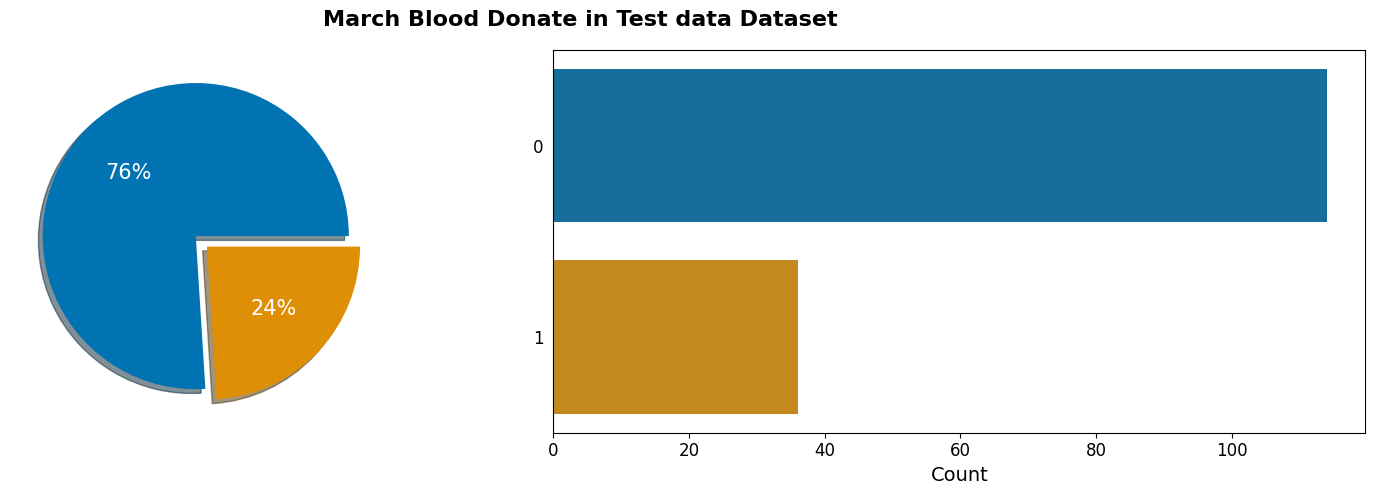

In [11]:
def plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train'):
    df_train = df_train.fillna('Nan')

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.flatten()

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df_train[target_col].unique()))
    ax[0].pie(
        df_train[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df_train[target_col].unique()),
        autopct='%1.f%%',
        textprops={'size': 15, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df_train,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )
    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    fig.suptitle(f'{target_col} in {name} Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(df_test, target_col, figsize=(16,5), palette='colorblind', name='Test data')

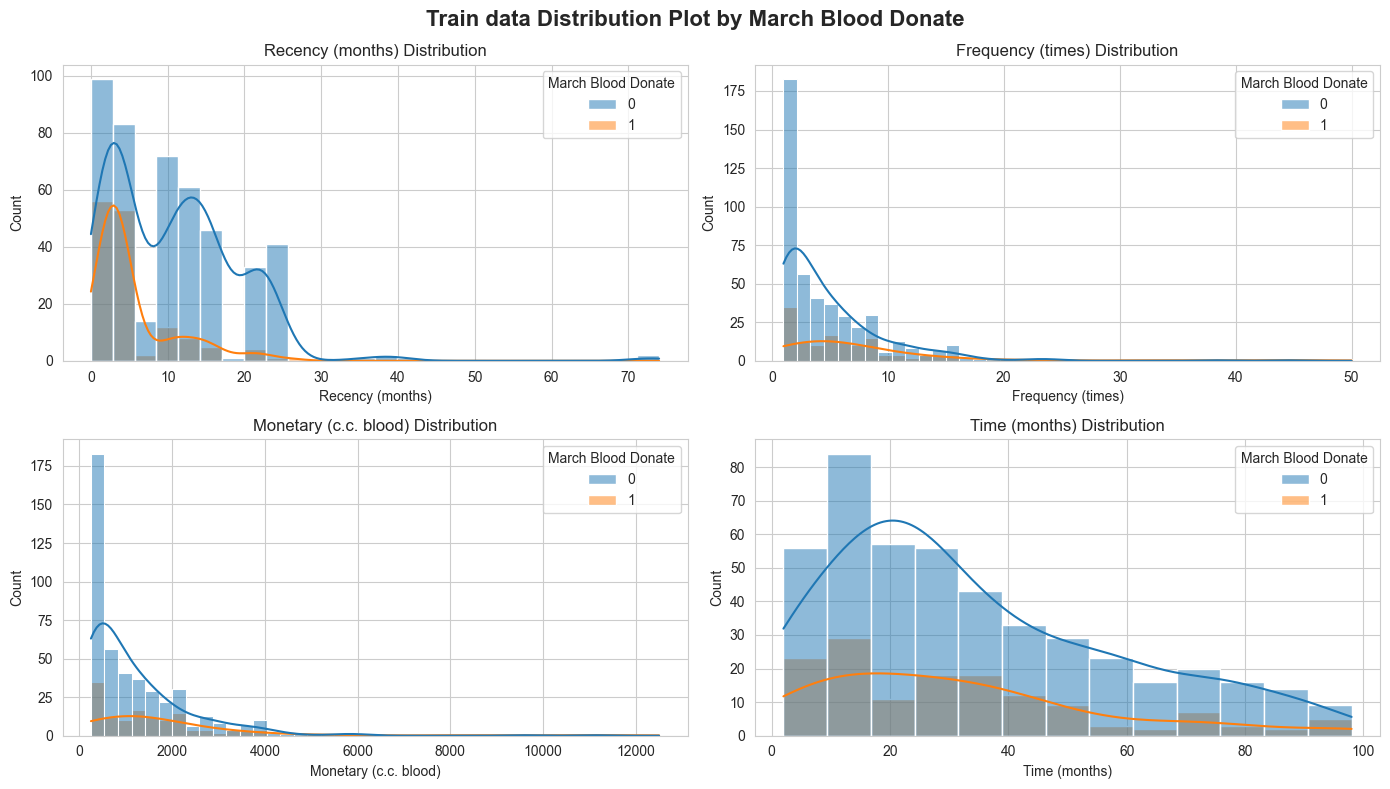

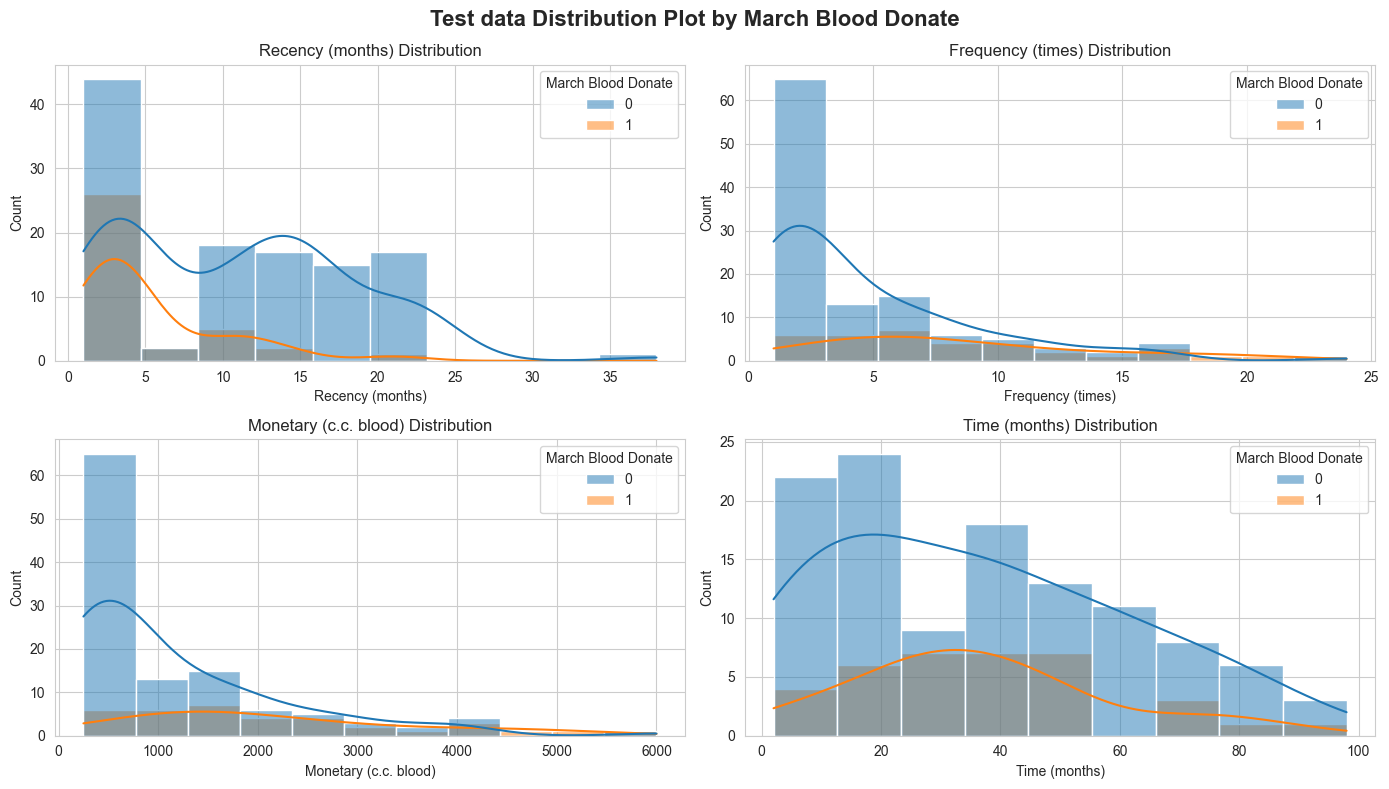

In [12]:
def plot_distribution(df, hue, title='', drop_cols=[]):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_cols = 2
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue) # sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Distribution Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()
    

plot_distribution(df_train, hue=target_col, title='Train data')
    
plot_distribution(df_test, hue=target_col, title='Test data')
# plot_distribution(original, hue='Sex', title='Original data')

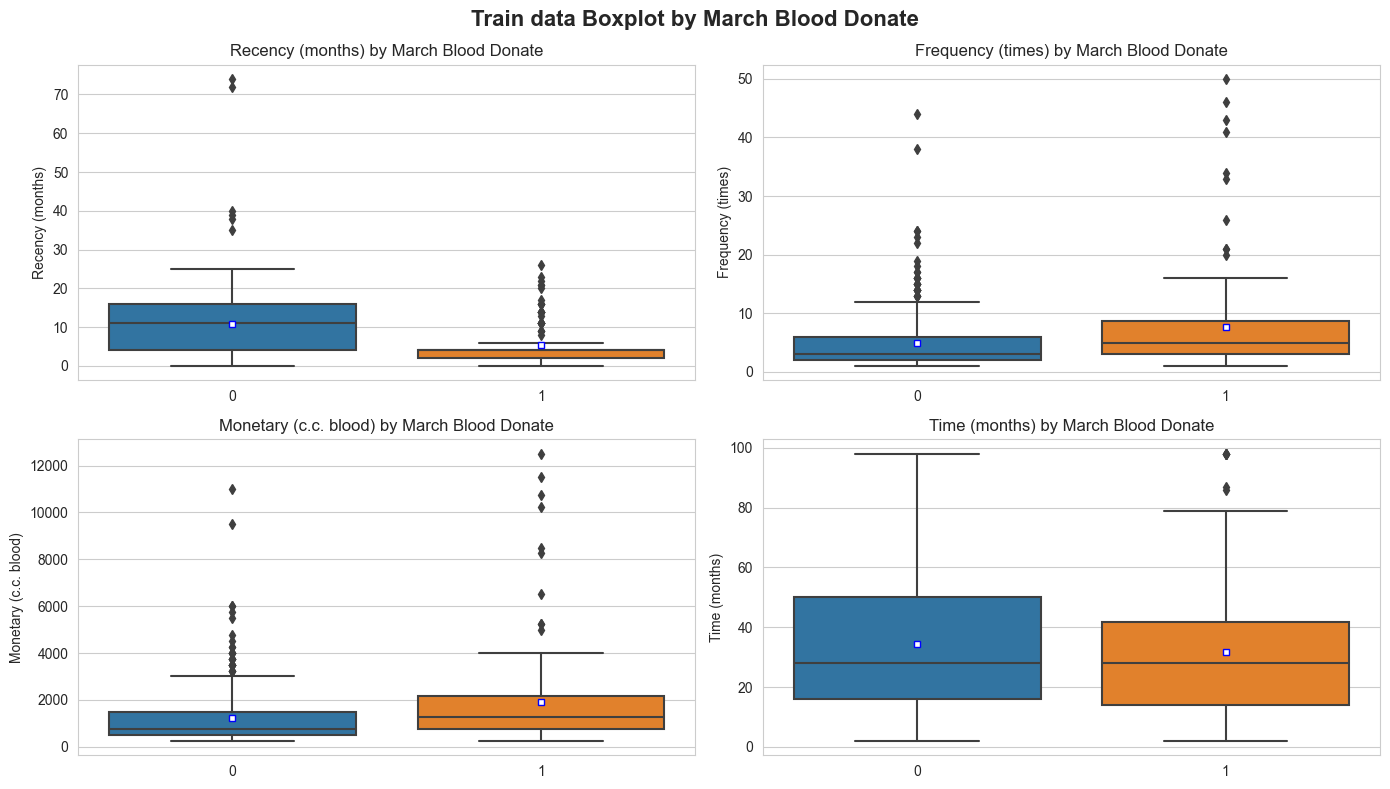

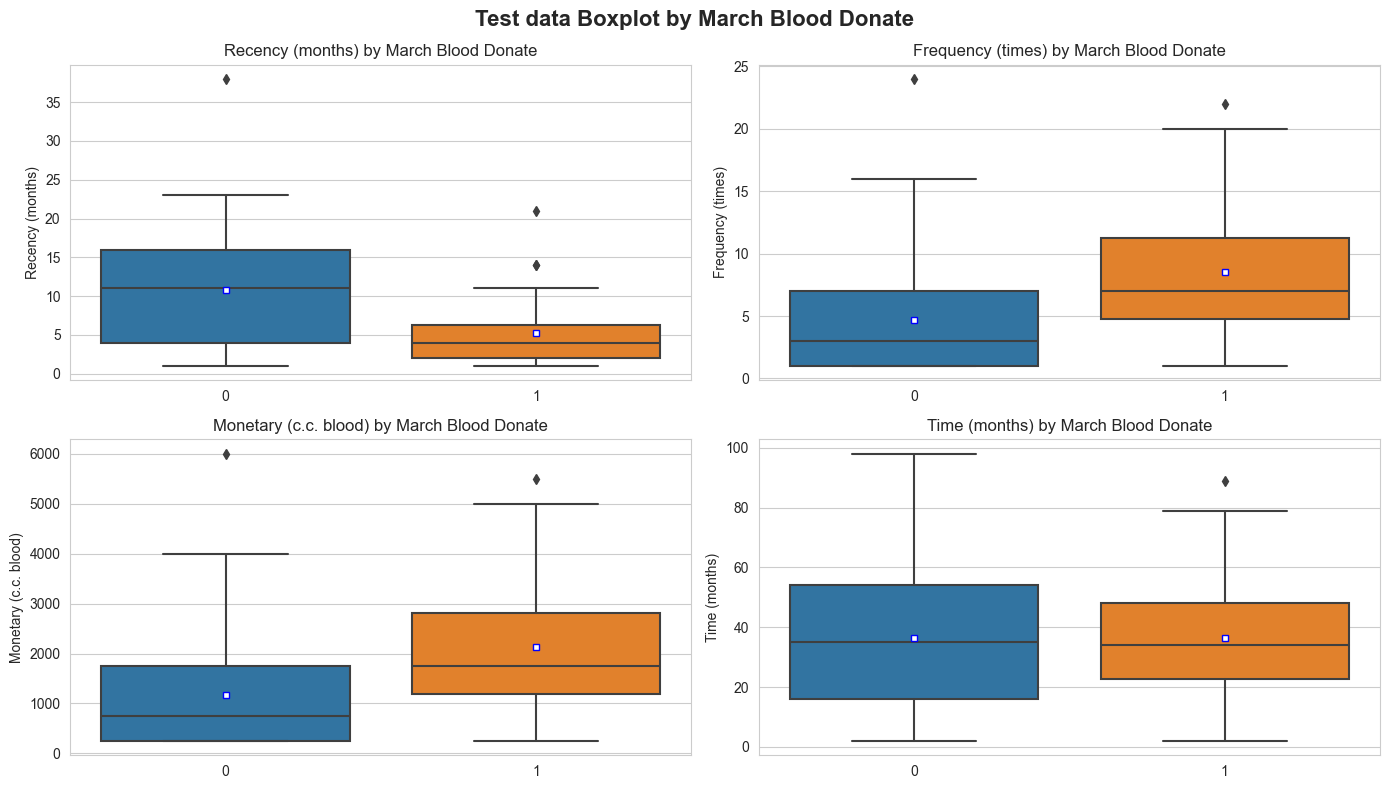

In [13]:
def plot_boxplot(df, hue, title='', drop_cols=[], n_cols=3):
    sns.set_style('whitegrid')

    cols = df.columns.drop(hue)
    cols = cols.drop(drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(data=df, x=hue, y=var_name, ax=ax, showmeans=True, 
                    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue", "markersize":"5"})
        ax.set_title(f'{var_name} by {hue}')
        ax.set_xlabel('')

    fig.suptitle(f'{title} Boxplot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()


plot_boxplot(df_train, hue=target_col, title='Train data', n_cols=2)
plot_boxplot(df_test, hue=target_col, title='Test data', n_cols=2)

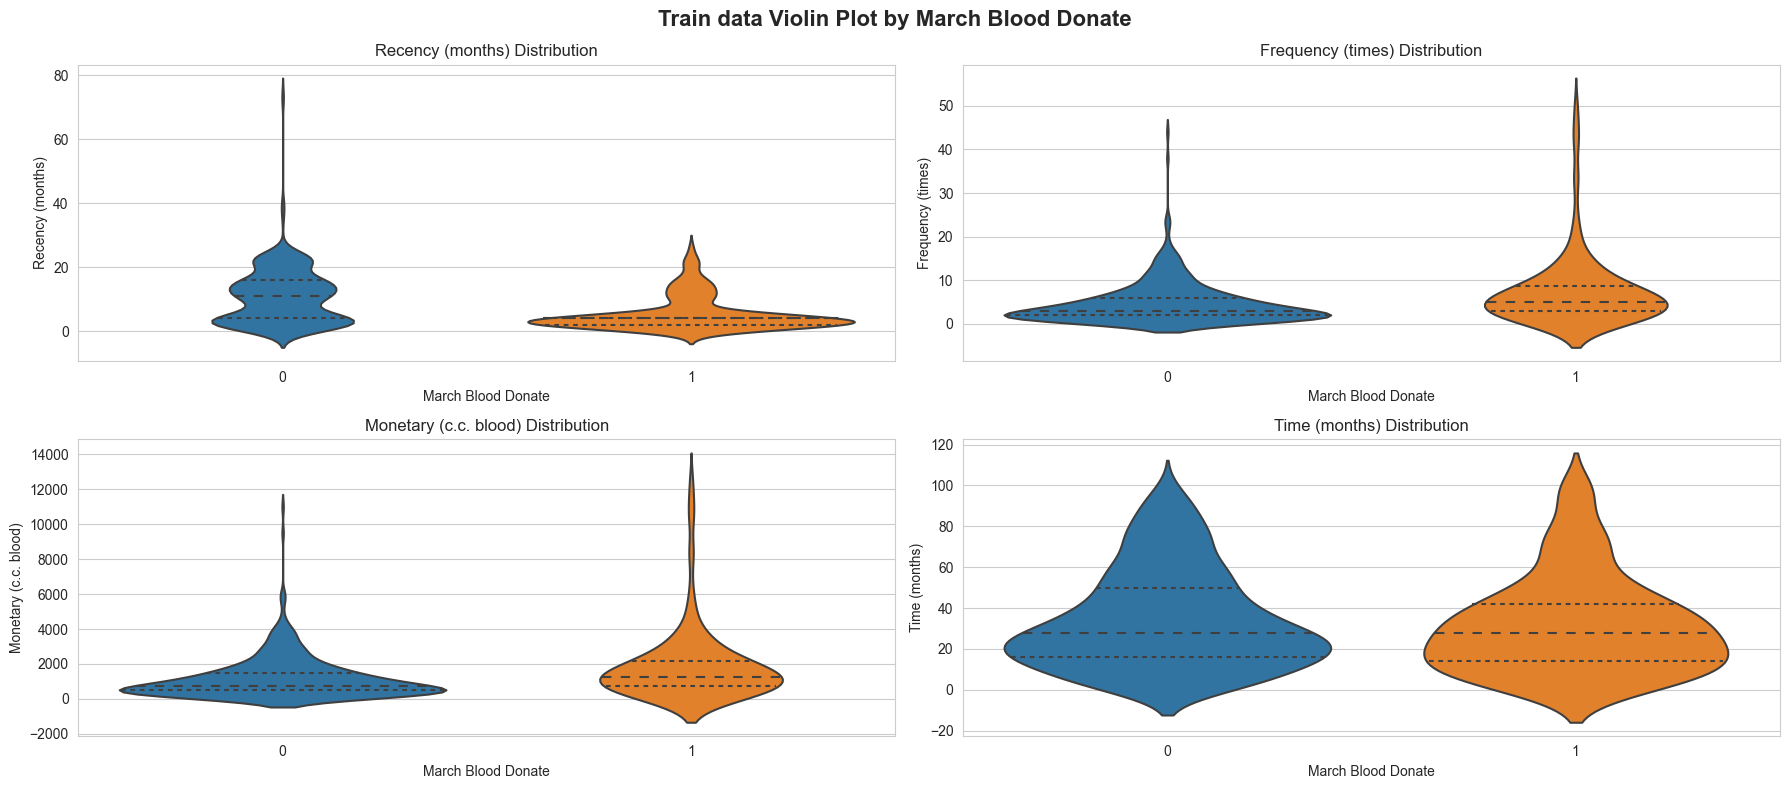

In [14]:
def plot_violinplot(df, hue, title='', drop_cols=[], n_cols=2):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.violinplot(data=df, x=hue, y=var_name, ax=ax, inner='quartile')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Violin Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_violinplot(df_train, hue=target_col, title='Train data', n_cols=2)

# Feature Engineering

In [15]:
# # Choose the tactics
# CFG.encoder = True
# CFG.height_solver = True
# CFG.scaler = True

# Function(Utils)

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN


class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'class'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='classification'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

# Usage

In [17]:
train = df_train.copy()
test = df_test.copy()

X_train = train.drop([target_col], axis=1)
y_train = train[target_col]

X_test = test.drop([target_col], axis=1)
y_test = test[target_col] # Normally we won't have this.

In [18]:
# X_train , y_train = fonks.overSample(X_train, y_train)

In [19]:
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")

X_train shape : (598, 4)
X_test shape : (150, 4)


In [20]:
y_train.value_counts()

0    456
1    142
Name: March Blood Donate, dtype: int64

In [21]:
y_test.value_counts()

0    114
1     36
Name: March Blood Donate, dtype: int64

# Data Splitting

In [22]:
from sklearn.model_selection import StratifiedKFold, KFold

class Splitter:
    def __init__(self, kfold=True, n_splits=5, cat_df=pd.DataFrame(), test_size=0.5):
        self.n_splits = n_splits
        self.kfold = kfold
        self.cat_df = cat_df
        self.test_size = test_size

    def split_data(self, X, y, random_state_list):
        if self.kfold == 'skf':
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, self.cat_df):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        elif self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

# Define Models

In [23]:
# Optuna
trials = 100

## Gaussian NB

In [24]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_train_pred = nb.predict(X_train)
nb_pred = nb.predict(X_test)

fonks.simple_scores(y_train, nb_train_pred , y_test , nb_pred)

Model Train Accuracy : 0.7525083612040134
Model Train Recall : 0.15492957746478872
Model Train Precision : 0.44
Model Train F1 : 0.22916666666666669

****************

Model Test Accuracy : 0.76
Model Test Recall : 0.25
Model Test Precision : 0.5
Model Test F1 : 0.3333333333333333


In [25]:
fonks.eval_metric(y_train, nb_train_pred , y_test , nb_pred , 'NB')

Test_Set NB
[[105   9]
 [ 27   9]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       114
           1       0.50      0.25      0.33        36

    accuracy                           0.76       150
   macro avg       0.65      0.59      0.59       150
weighted avg       0.72      0.76      0.73       150


Train_Set NB
[[428  28]
 [120  22]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       456
           1       0.44      0.15      0.23       142

    accuracy                           0.75       598
   macro avg       0.61      0.55      0.54       598
weighted avg       0.70      0.75      0.70       598



In [26]:
nb_acc = fonks.get_acc_score(y_test , nb_pred)
nb_f1 = fonks.get_f1_score(y_test , nb_pred )
nb_recall = fonks.get_recall(y_test , nb_pred)
nb_rocauc = fonks.get_roc_auc(y_test , nb_pred)
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')
# nb_rocauc = 0.98

nb_df = fonks.train_test_df(y_train, nb_train_pred , y_test , nb_pred , 'NB')
nb_df

,NB_train,NB_test
Accuracy,0.752508,0.76000
Recall,0.154930,0.25000
Precision,0.440000,0.50000
F1,0.478714,0.57735


## Decision Tree

In [27]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# import dpctl
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     dt_base = DecisionTreeClassifier()

#     params = {'max_depth' : np.arange(2,11) , 'min_samples_split' : np.arange(2,8) , 'max_features' : np.arange(2,10)}

#     dt_grid = GridSearchCV(dt_base , params , scoring='accuracy' , cv = 5) 
#     dt_grid.fit(X_train , y_train)

# print(f'Best parameters: {dt_grid.best_params_}')
# print(f'Best score: {dt_grid.best_score_:.2f}')

# unpatch_sklearn()

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 3 , max_features= 6 , min_samples_split= 3)
# dt = dt_grid.best_estimator_
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred)

Model Train Accuracy : 0.794314381270903
Model Train Recall : 0.352112676056338
Model Train Precision : 0.6172839506172839
Model Train F1 : 0.44843049327354256

****************

Model Test Accuracy : 0.8
Model Test Recall : 0.4166666666666667
Model Test Precision : 0.625
Model Test F1 : 0.5


In [29]:
fonks.eval_metric(y_train, dt_train_pred , y_test , dt_pred , 'DT')

Test_Set DT
[[105   9]
 [ 21  15]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       114
           1       0.62      0.42      0.50        36

    accuracy                           0.80       150
   macro avg       0.73      0.67      0.69       150
weighted avg       0.78      0.80      0.79       150


Train_Set DT
[[425  31]
 [ 92  50]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       456
           1       0.62      0.35      0.45       142

    accuracy                           0.79       598
   macro avg       0.72      0.64      0.66       598
weighted avg       0.77      0.79      0.77       598



In [30]:
dt_acc = fonks.get_acc_score(y_test , dt_pred)
dt_f1 = fonks.get_f1_score(y_test , dt_pred)
dt_recall = fonks.get_recall(y_test , dt_pred)
dt_rocauc = fonks.get_roc_auc(y_test , dt_pred)
# dt_rocauc = roc_auc_score(np.array(y_test.values), dt_pred, multi_class='ovr' , average='micro')

dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([nb_df , dt_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test
Accuracy,0.752508,0.76000,0.794314,0.800000
Recall,0.154930,0.25000,0.352113,0.416667
Precision,0.440000,0.50000,0.617284,0.625000
F1,0.478714,0.57735,0.669650,0.707107


## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_pred = knn.predict(X_test)

fonks.simple_scores(y_train, knn_train_pred , y_test , knn_pred)

Model Train Accuracy : 0.8177257525083612
Model Train Recall : 0.3732394366197183
Model Train Precision : 0.726027397260274
Model Train F1 : 0.4930232558139535

****************

Model Test Accuracy : 0.7666666666666667
Model Test Recall : 0.16666666666666666
Model Test Precision : 0.5454545454545454
Model Test F1 : 0.2553191489361702


In [32]:
fonks.eval_metric(y_train, knn_train_pred , y_test , knn_pred , 'KNN')

Test_Set KNN
[[109   5]
 [ 30   6]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       114
           1       0.55      0.17      0.26        36

    accuracy                           0.77       150
   macro avg       0.66      0.56      0.56       150
weighted avg       0.73      0.77      0.72       150


Train_Set KNN
[[436  20]
 [ 89  53]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       456
           1       0.73      0.37      0.49       142

    accuracy                           0.82       598
   macro avg       0.78      0.66      0.69       598
weighted avg       0.81      0.82      0.79       598



In [33]:
knn_acc = fonks.get_acc_score(y_test , knn_pred)
knn_f1 = fonks.get_f1_score(y_test , knn_pred)
knn_recall = fonks.get_recall(y_test , knn_pred )
knn_rocauc = fonks.get_roc_auc(y_test , knn_pred)

knn_df = fonks.train_test_df(y_train, knn_train_pred , y_test , knn_pred , 'KNN')
all_df = pd.concat([all_df , knn_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667
Recall,0.154930,0.25000,0.352113,0.416667,0.373239,0.166667
Precision,0.440000,0.50000,0.617284,0.625000,0.726027,0.545455
F1,0.478714,0.57735,0.669650,0.707107,0.702156,0.505291


# LogisticRegression

In [34]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import RandomizedSearchCV
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn
# import dpctl

# patch_sklearn()

# with config_context(target_offload='gpu:0'):
#         log_base = LogisticRegression(random_state= 53 , max_iter= 1000000)

#         params = {'penalty' : ['l1' , 'l2'] , 'C' : [0.001 , 0.01 , 0.1 , 1 , 3, 5, 10 ,25, 50 , 100 , 200 , 300 , 500 ,750] ,
#                 'solver' : ['lbfgs' , 'liblinear']}

#         log_grid = RandomizedSearchCV(log_base , params , scoring='accuracy' , cv = 5 , n_iter=50)
#         log_grid.fit(X_train , y_train)

# print(f'Best parameters: {log_grid.best_params_}')
# print(f'Best score: {log_grid.best_score_:.2f}')

# unpatch_sklearn()

In [35]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver = 'liblinear' , penalty= 'l1' , C= 3 , max_iter=10000) 
# log = log_grid.best_estimator_
log.fit(X_train , y_train)

log_train_pred = log.predict(X_train)
log_pred = log.predict(X_test)

fonks.simple_scores(y_train, log_train_pred , y_test , log_pred , 'Log')

Log Train Accuracy : 0.7725752508361204
Log Train Recall : 0.09859154929577464
Log Train Precision : 0.6363636363636364
Log Train F1 : 0.17073170731707318

****************

Log Test Accuracy : 0.7733333333333333
Log Test Recall : 0.08333333333333333
Log Test Precision : 0.75
Log Test F1 : 0.15


In [36]:
fonks.eval_metric(y_train, log_train_pred , y_test , log_pred , 'Log')

Test_Set Log
[[113   1]
 [ 33   3]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       114
           1       0.75      0.08      0.15        36

    accuracy                           0.77       150
   macro avg       0.76      0.54      0.51       150
weighted avg       0.77      0.77      0.70       150


Train_Set Log
[[448   8]
 [128  14]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       456
           1       0.64      0.10      0.17       142

    accuracy                           0.77       598
   macro avg       0.71      0.54      0.52       598
weighted avg       0.74      0.77      0.70       598



In [37]:
log_acc = fonks.get_acc_score(y_test , log_pred)
log_f1 = fonks.get_f1_score(y_test , log_pred)
log_recall = fonks.get_recall(y_test , log_pred)
log_rocauc = fonks.get_roc_auc(y_test , log_pred)

log_df = fonks.train_test_df(y_train, log_train_pred , y_test , log_pred , 'Log')
all_df = pd.concat([all_df, log_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667,0.772575,0.773333
Recall,0.154930,0.25000,0.352113,0.416667,0.373239,0.166667,0.098592,0.083333
Precision,0.440000,0.50000,0.617284,0.625000,0.726027,0.545455,0.636364,0.750000
F1,0.478714,0.57735,0.669650,0.707107,0.702156,0.505291,0.413197,0.387298


## SVC

In [38]:
# from sklearn.svm import SVC
# from sklearnex import patch_sklearn, config_context

# patch_sklearn()

# with config_context(target_offload='gpu:0'):

#     svc_base = SVC(random_state= 53)

#     params = {'kernel' : ['linear' , 'poly' , 'rbf'] , 'degree' : [2,3] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,10) }

#     svc_grid = GridSearchCV(svc_base , params , scoring='accuracy' , cv = 3)
#     svc_grid.fit(X_train,y_train)

# print(f'Best parameters: {svc_grid.best_params_}')
# print(f'Best score: {svc_grid.best_score_:.2f}')

# unpatch_sklearn()

In [39]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear' , gamma= 'scale' , C= 0.01 , degree= 2 , max_iter= 10000) 
# svc = svc_grid.best_estimator_
svc.fit(X_train , y_train)

svc_train_pred = svc.predict(X_train)
svc_pred = svc.predict(X_test)

fonks.simple_scores(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

SVC Train Accuracy : 0.7023411371237458
SVC Train Recall : 0.2535211267605634
SVC Train Precision : 0.3333333333333333
SVC Train F1 : 0.288

****************

SVC Test Accuracy : 0.7266666666666667
SVC Test Recall : 0.3888888888888889
SVC Test Precision : 0.42424242424242425
SVC Test F1 : 0.40579710144927533


In [40]:
fonks.eval_metric(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

Test_Set SVC
[[95 19]
 [22 14]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       114
           1       0.42      0.39      0.41        36

    accuracy                           0.73       150
   macro avg       0.62      0.61      0.61       150
weighted avg       0.72      0.73      0.72       150


Train_Set SVC
[[384  72]
 [106  36]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       456
           1       0.33      0.25      0.29       142

    accuracy                           0.70       598
   macro avg       0.56      0.55      0.55       598
weighted avg       0.68      0.70      0.69       598



In [41]:
svc_acc = fonks.get_acc_score(y_test , svc_pred)
svc_f1 = fonks.get_f1_score(y_test , svc_pred)
svc_recall = fonks.get_recall(y_test , svc_pred)
svc_rocauc = fonks.get_roc_auc(y_test , svc_pred)

svc_df = fonks.train_test_df(y_train, svc_train_pred , y_test , svc_pred , 'SVC')
all_df = pd.concat([all_df, svc_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667,0.772575,0.773333,0.702341,0.726667
Recall,0.154930,0.25000,0.352113,0.416667,0.373239,0.166667,0.098592,0.083333,0.253521,0.388889
Precision,0.440000,0.50000,0.617284,0.625000,0.726027,0.545455,0.636364,0.750000,0.333333,0.424242
F1,0.478714,0.57735,0.669650,0.707107,0.702156,0.505291,0.413197,0.387298,0.536656,0.637022


## Random Forest

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

In [43]:
# Optuna with KFold

# import optuna
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import KFold
# from sklearn.metrics import f1_score
# import pandas as pd

# def objective(trial):
#     rf_params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#         'max_depth': trial.suggest_int('max_depth', 2, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_int('max_features', 2, 5),
#         'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
#     }

#     model = RandomForestClassifier(**rf_params)
#     scores = []

#     # KFold ile veri setini bölme
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     for train_index, val_index in kf.split(X_train):
#         X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
#         y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

#         model.fit(X_train_kf, y_train_kf)
#         y_pred = model.predict(X_val_kf)
#         score = f1_score(y_val_kf, y_pred)
#         scores.append(score)

#     # KFold sonuçlarının ortalamasını döndürme
#     return sum(scores) / len(scores)

# # X_train ve y_train'i DataFrame olarak tanımlama
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

# X_train = pd.DataFrame(X_train)
# y_train = pd.DataFrame(y_train)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# print(f'Best parameters: {study.best_params}')
# print(f'Best score: {study.best_value:.2f}')

In [44]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def objective(trial):
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_int('max_features', 2, 5),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    model = RandomForestClassifier(**rf_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {rf_study.best_params}')
print(f'Best score: {rf_study.best_value:.2f}')

[I 2023-07-04 02:33:09,110] A new study created in memory with name: no-name-adf94a99-aa60-45ac-92df-b626273118be
[I 2023-07-04 02:33:09,634] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 630, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 4, 'bootstrap': True}. Best is trial 0 with value: 0.5.
[I 2023-07-04 02:33:10,008] Trial 1 finished with value: 0.33333333333333337 and parameters: {'n_estimators': 489, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 4, 'bootstrap': True}. Best is trial 0 with value: 0.5.
[I 2023-07-04 02:33:10,367] Trial 2 finished with value: 0.4680851063829788 and parameters: {'n_estimators': 375, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 4, 'bootstrap': True}. Best is trial 0 with value: 0.5.
[I 2023-07-04 02:33:11,026] Trial 3 finished with value: 0.4761904761904762 and parameters: {'n_estimators': 887, 'max_depth': 7, 'min_samples_split': 8,

Best parameters: {'n_estimators': 580, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 4, 'bootstrap': False}
Best score: 0.59


In [45]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearnex import patch_sklearn, unpatch_sklearn,config_context

# patch_sklearn()

# with config_context(target_offload='gpu:0'):
#     rf_base = RandomForestClassifier(random_state= 53)

#     params = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': ['sqrt',2,3,4]
#     }


#     rf_grid = GridSearchCV(rf_base , params , scoring='accuracy' , cv = 3)
#     rf_grid.fit(X_train,y_train)

# print(f'Best parameters: {rf_grid.best_params_}')
# print(f'Best score: {rf_grid.best_score_:.2f}')

# unpatch_sklearn()

In [46]:
from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators = 630 , max_features= 4 , max_depth = 7 , min_samples_split= 6 , min_samples_leaf=8 , bootstrap=True)
# rf = rf_grid.best_estimator_
rf = RandomForestClassifier(**rf_study.best_params)
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)

fonks.simple_scores(y_train, rf_train_pred , y_test , rf_pred , 'RF')

RF Train Accuracy : 0.7866108786610879
RF Train Recall : 0.4051724137931034
RF Train Precision : 0.5875
RF Train F1 : 0.47959183673469385

****************

RF Test Accuracy : 0.8266666666666667
RF Test Recall : 0.5555555555555556
RF Test Precision : 0.6666666666666666
RF Test F1 : 0.606060606060606


In [47]:
fonks.eval_metric(y_train, rf_train_pred , y_test , rf_pred , 'RF')

Test_Set RF
[[104  10]
 [ 16  20]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       114
           1       0.67      0.56      0.61        36

    accuracy                           0.83       150
   macro avg       0.77      0.73      0.75       150
weighted avg       0.82      0.83      0.82       150


Train_Set RF
[[329  33]
 [ 69  47]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       362
           1       0.59      0.41      0.48       116

    accuracy                           0.79       478
   macro avg       0.71      0.66      0.67       478
weighted avg       0.77      0.79      0.77       478



In [48]:
rf_acc = fonks.get_acc_score(y_test , rf_pred)
rf_f1 = fonks.get_f1_score(y_test , rf_pred)
rf_recall = fonks.get_recall(y_test , rf_pred)
rf_rocauc = fonks.get_roc_auc(y_test , rf_pred)

rf_df = fonks.train_test_df(y_train, rf_train_pred , y_test , rf_pred , 'RF')
all_df = pd.concat([all_df, rf_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667,0.772575,0.773333,0.702341,0.726667,0.786611,0.826667
Recall,0.154930,0.25000,0.352113,0.416667,0.373239,0.166667,0.098592,0.083333,0.253521,0.388889,0.405172,0.555556
Precision,0.440000,0.50000,0.617284,0.625000,0.726027,0.545455,0.636364,0.750000,0.333333,0.424242,0.587500,0.666667
F1,0.478714,0.57735,0.669650,0.707107,0.702156,0.505291,0.413197,0.387298,0.536656,0.637022,0.692526,0.778499


## GradientBoosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

def objective(trial):
    gb_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
        'random_state': 42
    }

    model = GradientBoostingClassifier(**gb_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

gb_study = optuna.create_study(direction='maximize')
gb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {gb_study.best_params}')
print(f'Best score: {gb_study.best_value:.2f}')


[I 2023-07-04 02:33:51,305] A new study created in memory with name: no-name-6e0d58b0-bf33-4143-8081-5bc68f2eae8a
[I 2023-07-04 02:33:51,470] Trial 0 finished with value: 0.25 and parameters: {'learning_rate': 0.005423467283392718, 'n_estimators': 538, 'subsample': 0.19551364240096397, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 0.6845288181540258}. Best is trial 0 with value: 0.25.
[I 2023-07-04 02:33:51,802] Trial 1 finished with value: 0.5217391304347826 and parameters: {'learning_rate': 0.18449009991438703, 'n_estimators': 430, 'subsample': 0.918410148452163, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 0.906276881782059}. Best is trial 1 with value: 0.5217391304347826.
[I 2023-07-04 02:33:52,166] Trial 2 finished with value: 0.4897959183673469 and parameters: {'learning_rate': 0.10806764204425587, 'n_estimators': 829, 'subsample': 0.26033333913910484, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf':

Best parameters: {'learning_rate': 0.36165918804535263, 'n_estimators': 611, 'subsample': 0.3072247556668217, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 0.32637857508255474}
Best score: 0.61


In [50]:
# from sklearn.ensemble import GradientBoostingClassifier
# import dpctl
# from sklearnex import patch_sklearn, config_context

# patch_sklearn()

# with config_context(target_offload='gpu:0'):
#         gb_base = GradientBoostingClassifier()

#         params = {'learning_rate' : [0.001,0.01,0.1,1],
#                 'n_estimators' : [80 , 100 , 150 , 200 , 300 , 400 , 500],
#                 'min_samples_split' : np.arange(2,7),
#                 'max_depth' : np.arange(2,10),
#                 }

#         gb_rand = RandomizedSearchCV(gb_base , params , scoring='accuracy' , cv = 3 , n_iter= 150)
#         gb_rand.fit(X_train,y_train)


# print(f'Best parameters: {gb_rand.best_params_}')
# print(f'Best score: {gb_rand.best_score_:.2f}')

# unpatch_sklearn()

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# gb = GradientBoostingClassifier(n_estimators=200 , min_samples_split=5, max_depth=6 , learning_rate= 1)
# gb = gb_rand.best_estimator_
gb = GradientBoostingClassifier(**gb_study.best_params)
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_test)

fonks.simple_scores(y_train, gb_train_pred , y_test , gb_pred , 'GB')

GB Train Accuracy : 0.8158995815899581
GB Train Recall : 0.5258620689655172
GB Train Precision : 0.648936170212766
GB Train F1 : 0.580952380952381

****************

GB Test Accuracy : 0.7733333333333333
GB Test Recall : 0.4722222222222222
GB Test Precision : 0.53125
GB Test F1 : 0.4999999999999999


In [52]:
fonks.eval_metric(y_train, gb_train_pred , y_test , gb_pred , 'GB')

Test_Set GB
[[99 15]
 [19 17]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       114
           1       0.53      0.47      0.50        36

    accuracy                           0.77       150
   macro avg       0.69      0.67      0.68       150
weighted avg       0.77      0.77      0.77       150


Train_Set GB
[[329  33]
 [ 55  61]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       362
           1       0.65      0.53      0.58       116

    accuracy                           0.82       478
   macro avg       0.75      0.72      0.73       478
weighted avg       0.81      0.82      0.81       478



In [53]:
gb_acc = fonks.get_acc_score(y_test , gb_pred)
gb_f1 = fonks.get_f1_score(y_test , gb_pred)
gb_recall = fonks.get_recall(y_test , gb_pred)
gb_rocauc = fonks.get_roc_auc(y_test , gb_pred)

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_test , gb_pred , 'GB')
all_df = pd.concat([all_df, gb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667,0.772575,0.773333,0.702341,0.726667,0.786611,0.826667,0.815900,0.773333
Recall,0.154930,0.25000,0.352113,0.416667,0.373239,0.166667,0.098592,0.083333,0.253521,0.388889,0.405172,0.555556,0.525862,0.472222
Precision,0.440000,0.50000,0.617284,0.625000,0.726027,0.545455,0.636364,0.750000,0.333333,0.424242,0.587500,0.666667,0.648936,0.531250
F1,0.478714,0.57735,0.669650,0.707107,0.702156,0.505291,0.413197,0.387298,0.536656,0.637022,0.692526,0.778499,0.762202,0.707107


## XGBoost

In [54]:
# y_train_xgb = y_train.replace({1:0 , 2:1 ,3:2 , 4:3}).astype(int)
# y_test_xgb = y_test.replace({1:0 , 2:1 ,3:2 , 4:3}).astype(int)

In [55]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def objective(trial):
    xgb_params = {
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'gpu_id': 0,
        'enable_categorical': True,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1.0),
        'eta': trial.suggest_loguniform('eta', 0.001, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0)
    }

    model = XGBClassifier(**xgb_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {xgb_study.best_params}')
print(f'Best score: {xgb_study.best_value:.2f}')

[I 2023-07-04 02:34:16,320] A new study created in memory with name: no-name-ee3a5b67-6ba3-4885-aa44-23b81452b768
[I 2023-07-04 02:34:16,673] Trial 0 finished with value: 0.3684210526315789 and parameters: {'learning_rate': 0.1372766471076383, 'n_estimators': 269, 'subsample': 0.5137309014197147, 'colsample_bytree': 0.3773270424941296, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 0.3399897735464576, 'eta': 0.022299528859665043, 'reg_alpha': 0.002416550485149317, 'reg_lambda': 0.007504168470842479}. Best is trial 0 with value: 0.3684210526315789.
[I 2023-07-04 02:34:16,969] Trial 1 finished with value: 0.45 and parameters: {'learning_rate': 0.0741305846454565, 'n_estimators': 428, 'subsample': 0.3557372766666844, 'colsample_bytree': 0.812087627540716, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 0.057952242036409786, 'eta': 0.020296130096043512, 'reg_alpha': 0.027504226582424553, 'reg_lambda': 0.0011246229985564756}. Best is trial 1 with value: 0.45.
[I 2023-07-04 02:34:17,200] T

Best parameters: {'learning_rate': 0.4468629471878396, 'n_estimators': 669, 'subsample': 0.7841616062880463, 'colsample_bytree': 0.8108698253892791, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 0.010758232018622183, 'eta': 0.0013942949704122084, 'reg_alpha': 0.0014916235115274893, 'reg_lambda': 0.010479261079722316}
Best score: 0.62


In [56]:
# GridSearch benzeri Optuna

# import optuna
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score

# def objective(trial):
#     xgb_params = {
#         'tree_method': 'gpu_hist',
#         'gpu_id': 0,
#         'enable_categorical': True,
#         'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.1, 1]),
#         'n_estimators': trial.suggest_categorical('n_estimators', [80, 100, 150, 200, 300]),
#         'subsample': trial.suggest_categorical('subsample', [0.5, 0.7, 0.8, 1]),
#         'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.7, 0.8, 1]),
#         'max_depth': trial.suggest_int('max_depth', 2, 7)
#     }

#     model = XGBClassifier(**xgb_params)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_val)
#     f1 = f1_score(y_val, y_pred)
#     return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# print(f'Best parameters: {study.best_params}')
# print(f'Best score: {study.best_value:.2f}')

In [57]:
# from xgboost import XGBClassifier
# from sklearnex import patch_sklearn,config_context
# import dpctl

# patch_sklearn()

# with config_context(target_offload="gpu:0"):
#     xgb_base = XGBClassifier(tree_method="gpu_hist",
#                              gpu_id=0,
#                              enable_categorical = True)

#     params = {'learning_rate' : [0.01,0.1,1],
#             'n_estimators' : [80 , 100 , 150 , 200 , 300],
#             'subsample': [0.5 , 0.7 , 0.8 , 1],
#             'colsample_bytree' : [0.5 , 0.7 , 0.8 , 1],
#             'max_depth' : np.arange(2,8),
#             }

#     xgb_grid = GridSearchCV(xgb_base , params , scoring='accuracy' , cv = 3)
#     xgb_grid.fit(X_train,y_train)


# print(f'Best parameters: {xgb_grid.best_params_}')
# print(f'Best score: {xgb_grid.best_score_:.2f}')

# unpatch_sklearn()

In [58]:
from xgboost import XGBClassifier

# xgb = XGBClassifier(n_estimators = 80 , learning_rate = 1 , max_depth = 3 , subsample = 0.8 , colsample_bytree = 0.5 , enable_categorical = True , tree_method="gpu_hist", gpu_id=0)
# xgb = xgb_grid.best_estimator_
xgb = XGBClassifier(**xgb_study.best_params)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

fonks.simple_scores(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

XGB Train Accuracy : 0.8702928870292888
XGB Train Recall : 0.5689655172413793
XGB Train Precision : 0.8461538461538461
XGB Train F1 : 0.6804123711340206

****************

XGB Test Accuracy : 0.7466666666666667
XGB Test Recall : 0.2777777777777778
XGB Test Precision : 0.45454545454545453
XGB Test F1 : 0.3448275862068966


In [59]:
fonks.eval_metric(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

Test_Set XGB
[[102  12]
 [ 26  10]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       114
           1       0.45      0.28      0.34        36

    accuracy                           0.75       150
   macro avg       0.63      0.59      0.59       150
weighted avg       0.71      0.75      0.72       150


Train_Set XGB
[[350  12]
 [ 50  66]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       362
           1       0.85      0.57      0.68       116

    accuracy                           0.87       478
   macro avg       0.86      0.77      0.80       478
weighted avg       0.87      0.87      0.86       478



In [60]:
xgb_acc = fonks.get_acc_score(y_test , xgb_pred)
xgb_f1 = fonks.get_f1_score(y_test , xgb_pred)
xgb_recall = fonks.get_recall(y_test , xgb_pred)
xgb_rocauc = fonks.get_roc_auc(y_test , xgb_pred)

xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')
all_df = pd.concat([all_df, xgb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667,0.772575,0.773333,0.702341,0.726667,0.786611,0.826667,0.815900,0.773333,0.870293,0.746667
Recall,0.154930,0.25000,0.352113,0.416667,0.373239,0.166667,0.098592,0.083333,0.253521,0.388889,0.405172,0.555556,0.525862,0.472222,0.568966,0.277778
Precision,0.440000,0.50000,0.617284,0.625000,0.726027,0.545455,0.636364,0.750000,0.333333,0.424242,0.587500,0.666667,0.648936,0.531250,0.846154,0.454545
F1,0.478714,0.57735,0.669650,0.707107,0.702156,0.505291,0.413197,0.387298,0.536656,0.637022,0.692526,0.778499,0.762202,0.707107,0.824871,0.587220


## LightGBM

In [61]:
from lightgbm import LGBMClassifier

def objective(trial):
    lgbm_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 10),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0),
        'random_state': 42
    }

    model = LGBMClassifier(**lgbm_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

lgb_study = optuna.create_study(direction='maximize')
lgb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {lgb_study.best_params}')
print(f'Best score: {lgb_study.best_value:.2f}')

[I 2023-07-04 02:35:19,096] A new study created in memory with name: no-name-6ff587f5-74ce-492f-ac48-07d57fe1357c
[I 2023-07-04 02:35:19,174] Trial 0 finished with value: 0.3589743589743589 and parameters: {'learning_rate': 0.23562498909861238, 'n_estimators': 427, 'subsample': 0.8342289179155481, 'colsample_bytree': 0.2113983119616268, 'max_depth': 3, 'min_child_samples': 2, 'reg_alpha': 0.7289906830125866, 'reg_lambda': 0.07036202777550932}. Best is trial 0 with value: 0.3589743589743589.
[I 2023-07-04 02:35:19,288] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.002953925713939625, 'n_estimators': 561, 'subsample': 0.23023994348763224, 'colsample_bytree': 0.7036159846881417, 'max_depth': 2, 'min_child_samples': 9, 'reg_alpha': 0.004603225078540517, 'reg_lambda': 0.616012504134173}. Best is trial 0 with value: 0.3589743589743589.
[I 2023-07-04 02:35:19,608] Trial 2 finished with value: 0.41666666666666663 and parameters: {'learning_rate': 0.05162365642534206, 'n_

Best parameters: {'learning_rate': 0.02136659283854482, 'n_estimators': 106, 'subsample': 0.9723671916558996, 'colsample_bytree': 0.7391841393060813, 'max_depth': 6, 'min_child_samples': 4, 'reg_alpha': 0.05285938687406723, 'reg_lambda': 0.005892284963510247}
Best score: 0.57


In [62]:
# from lightgbm import LGBMClassifier

# patch_sklearn()

# with config_context(target_offload='gpu:0'):
#         lgb_base = LGBMClassifier(device = 'gpu')

#         params = {
#                 'n_estimators': [100, 200, 300],
#                 'max_depth': [3, 5, 7 , 6 , 7, 8],
#                 'learning_rate': [1,0.1,0.01],
#                 'subsample': [0.7,0.8, 0.9, 1.0],
#                 'colsample_bytree': [0.8, 0.9, 1.0],
#                 }

#         lgb_grid = GridSearchCV(lgb_base , params , scoring='accuracy' , cv = 3)
#         lgb_grid.fit(X_train,y_train)


# print(f'Best parameters: {lgb_grid.best_params_}')
# print(f'Best score: {lgb_grid.best_score_:.2f}')

# unpatch_sklearn()

In [63]:
from lightgbm import LGBMClassifier

# lgb = LGBMClassifier(n_estimators= 100 , learning_rate = 1 , max_depth = 3 , subsample = 0.7 , colsample_bytree = 0.8)
# lgb = lgb_grid.best_estimator_
lgb = LGBMClassifier(**lgb_study.best_params)
lgb.fit(X_train , y_train)

lgb_train_pred = lgb.predict(X_train)
lgb_pred = lgb.predict(X_test)

fonks.simple_scores(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')

LGB Train Accuracy : 0.8389121338912134
LGB Train Recall : 0.4051724137931034
LGB Train Precision : 0.8545454545454545
LGB Train F1 : 0.5497076023391813

****************

LGB Test Accuracy : 0.7866666666666666
LGB Test Recall : 0.2777777777777778
LGB Test Precision : 0.625
LGB Test F1 : 0.3846153846153846


In [64]:
fonks.eval_metric(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')

Test_Set LGB
[[108   6]
 [ 26  10]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       114
           1       0.62      0.28      0.38        36

    accuracy                           0.79       150
   macro avg       0.72      0.61      0.63       150
weighted avg       0.76      0.79      0.75       150


Train_Set LGB
[[354   8]
 [ 69  47]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       362
           1       0.85      0.41      0.55       116

    accuracy                           0.84       478
   macro avg       0.85      0.69      0.73       478
weighted avg       0.84      0.84      0.82       478



In [65]:
lgb_acc = fonks.get_acc_score(y_test , lgb_pred)
lgb_f1 = fonks.get_f1_score(y_test , lgb_pred)
lgb_recall = fonks.get_recall(y_test , lgb_pred)
lgb_rocauc = fonks.get_roc_auc(y_test , lgb_pred)

lgb_df = fonks.train_test_df(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')
all_df = pd.concat([all_df, lgb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667,0.772575,0.773333,0.702341,0.726667,0.786611,0.826667,0.815900,0.773333,0.870293,0.746667,0.838912,0.786667
Recall,0.154930,0.25000,0.352113,0.416667,0.373239,0.166667,0.098592,0.083333,0.253521,0.388889,0.405172,0.555556,0.525862,0.472222,0.568966,0.277778,0.405172,0.277778
Precision,0.440000,0.50000,0.617284,0.625000,0.726027,0.545455,0.636364,0.750000,0.333333,0.424242,0.587500,0.666667,0.648936,0.531250,0.846154,0.454545,0.854545,0.625000
F1,0.478714,0.57735,0.669650,0.707107,0.702156,0.505291,0.413197,0.387298,0.536656,0.637022,0.692526,0.778499,0.762202,0.707107,0.824871,0.587220,0.741423,0.620174


## CatBoost

In [66]:
from catboost import CatBoostClassifier

def objective(trial):
    catboost_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0),
        'random_state': 42,
        'eval_metric': 'F1',
        'verbose': False
    }

    model = CatBoostClassifier(**catboost_params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=10, verbose=False)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

cb_study = optuna.create_study(direction='maximize')
cb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {cb_study.best_params}')
print(f'Best score: {cb_study.best_value:.2f}')

[I 2023-07-04 02:35:36,638] A new study created in memory with name: no-name-92f29eed-f8b3-4ece-9f58-568de898560b
[I 2023-07-04 02:35:36,844] Trial 0 finished with value: 0.13793103448275862 and parameters: {'learning_rate': 0.0037116102295958603, 'n_estimators': 973, 'subsample': 0.6635433862470012, 'colsample_bylevel': 0.7774396734172747, 'max_depth': 7, 'min_child_samples': 8, 'reg_lambda': 0.0012393944566650823}. Best is trial 0 with value: 0.13793103448275862.
[I 2023-07-04 02:35:36,883] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.012706854757456391, 'n_estimators': 825, 'subsample': 0.1569620298990571, 'colsample_bylevel': 0.10117614588335541, 'max_depth': 7, 'min_child_samples': 2, 'reg_lambda': 3.601781965266799}. Best is trial 0 with value: 0.13793103448275862.
[I 2023-07-04 02:35:36,930] Trial 2 finished with value: 0.13793103448275862 and parameters: {'learning_rate': 0.003928565556958096, 'n_estimators': 943, 'subsample': 0.8929529675934196, 'colsam

Best parameters: {'learning_rate': 0.41991736443309785, 'n_estimators': 151, 'subsample': 0.8330085587368142, 'colsample_bylevel': 0.8279784784702213, 'max_depth': 4, 'min_child_samples': 7, 'reg_lambda': 0.005004318986125535}
Best score: 0.62


In [67]:
# for col in cat_cols:
#     X_train[col] = X_train[col].astype('int32')
#     X_train[col] = X_train[col].astype('category')
    
#     X_test[col] = X_test[col].astype('int32')
#     X_test[col] = X_test[col].astype('category')

In [68]:
# from catboost import CatBoostClassifier
# from sklearnex import patch_sklearn , config_context

# patch_sklearn()

# with config_context(target_offload='gpu:0'):
#         cb_base = CatBoostClassifier(task_type="GPU", devices='gpu:0' , cat_features=cat_cols)

#         params = {
#                 'iterations': [100, 200, 300, 400],
#                 'depth': [3, 5, 7, 9],
#                 'learning_rate': [1, 0.1, 0.01, ],
#                 'random_seed': [53],
#                 }

#         cb_grid = GridSearchCV(cb_base , params , scoring='accuracy' , cv = 3 )
#         cb_grid.fit(X_train,y_train)


# print(f'Best parameters: {cb_grid.best_params_}')
# print(f'Best score: {cb_grid.best_score_:.2f}')

# unpatch_sklearn()

In [69]:
from catboost import CatBoostClassifier

# cb = CatBoostClassifier(iterations= 100 , learning_rate = 0.1 , depth = 3  , eval_metric='Accuracy' , random_state= 53 , task_type="GPU", devices='gpu:0' )
# cb = CatBoostClassifier(iterations= 400 , learning_rate = 0.01 , depth = 3  , eval_metric='Accuracy' , random_state= 53 , task_type="GPU", devices='gpu:0' , cat_features=cat_cols )
# cb = cb_grid.best_estimator_
cb = CatBoostClassifier(**cb_study.best_params)
cb.fit(X_train , y_train , eval_set= (X_test, y_test))

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_test)

fonks.simple_scores(y_train, cb_train_pred , y_test , cb_pred , 'CatB')

0:	learn: 0.5792938	test: 0.5816378	best: 0.5816378 (0)	total: 390us	remaining: 58.5ms
1:	learn: 0.5287645	test: 0.5400627	best: 0.5400627 (1)	total: 652us	remaining: 48.6ms
2:	learn: 0.5045426	test: 0.5060132	best: 0.5060132 (2)	total: 1.04ms	remaining: 51.6ms
3:	learn: 0.4990864	test: 0.5009402	best: 0.5009402 (3)	total: 1.28ms	remaining: 47.1ms
4:	learn: 0.4910324	test: 0.4860360	best: 0.4860360 (4)	total: 1.66ms	remaining: 48.4ms
5:	learn: 0.4858496	test: 0.4758443	best: 0.4758443 (5)	total: 1.98ms	remaining: 47.9ms
6:	learn: 0.4748910	test: 0.4704026	best: 0.4704026 (6)	total: 2.28ms	remaining: 46.8ms
7:	learn: 0.4666274	test: 0.4640876	best: 0.4640876 (7)	total: 2.62ms	remaining: 46.9ms
8:	learn: 0.4631313	test: 0.4637639	best: 0.4637639 (8)	total: 2.88ms	remaining: 45.5ms
9:	learn: 0.4585907	test: 0.4580019	best: 0.4580019 (9)	total: 3.17ms	remaining: 44.7ms
10:	learn: 0.4522076	test: 0.4561641	best: 0.4561641 (10)	total: 3.4ms	remaining: 43.3ms
11:	learn: 0.4495703	test: 0.4557

In [70]:
fonks.eval_metric(y_train, cb_train_pred , y_test , cb_pred , 'CatB')

Test_Set CatB
[[110   4]
 [ 26  10]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       114
           1       0.71      0.28      0.40        36

    accuracy                           0.80       150
   macro avg       0.76      0.62      0.64       150
weighted avg       0.79      0.80      0.76       150


Train_Set CatB
[[350  12]
 [ 81  35]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       362
           1       0.74      0.30      0.43       116

    accuracy                           0.81       478
   macro avg       0.78      0.63      0.66       478
weighted avg       0.80      0.81      0.77       478



In [71]:
cb_acc = fonks.get_acc_score(y_test , cb_pred)
cb_f1 = fonks.get_f1_score(y_test , cb_pred)
cb_recall = fonks.get_recall(y_test , cb_pred)
cb_rocauc = fonks.get_roc_auc(y_test , cb_pred)

cb_df = fonks.train_test_df(y_train, cb_train_pred , y_test , cb_pred , 'CatB')
all_df = pd.concat([all_df, cb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test,CatB_train,CatB_test
Accuracy,0.752508,0.76000,0.794314,0.800000,0.817726,0.766667,0.772575,0.773333,0.702341,0.726667,0.786611,0.826667,0.815900,0.773333,0.870293,0.746667,0.838912,0.786667,0.805439,0.800000
Recall,0.154930,0.25000,0.352113,0.416667,0.373239,0.166667,0.098592,0.083333,0.253521,0.388889,0.405172,0.555556,0.525862,0.472222,0.568966,0.277778,0.405172,0.277778,0.301724,0.277778
Precision,0.440000,0.50000,0.617284,0.625000,0.726027,0.545455,0.636364,0.750000,0.333333,0.424242,0.587500,0.666667,0.648936,0.531250,0.846154,0.454545,0.854545,0.625000,0.744681,0.714286
F1,0.478714,0.57735,0.669650,0.707107,0.702156,0.505291,0.413197,0.387298,0.536656,0.637022,0.692526,0.778499,0.762202,0.707107,0.824871,0.587220,0.741423,0.620174,0.655323,0.632456


# Ensemble Model

### Define Models

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
class Classifier:
    def __init__(self, n_estimators=2000, device="gpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params = {
                'n_estimators': 15000,
                'learning_rate': 0.00482382842096919,
                'booster': 'gbtree',
                'lambda': 0.000235366507474591,
                'alpha': 0.0000115977765684837,
                'subsample': 0.35955930593108,
                'colsample_bytree': 0.898528184386095,
                'max_depth': 12,
                'min_child_weight': 8,
                'eta': 0.0000784943239744148,
                'gamma': 1.6661346939401E-07,
                'grow_policy': 'lossguide',
                'n_jobs': -1,
                'objective': 'reg:pseudohubererror', # reg:pseudohubererror
                'eval_metric': 'mae',
                'verbosity': 0,
                'random_state': self.random_state,
            }
            
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        
        lgb1_params = {
            'device'            : "gpu" if self.device else "cpu",
            'objective'         : 'regression_l1',
            'metric'            : 'mean_absolute_error',
            'boosting_type'     : 'gbdt',
            'random_state'      : self.random_state,
            'feature_fraction'  : 0.70,
            'learning_rate'     : 0.018,
            'max_depth'         : 16,
            'n_estimators'      : 15_000,
            'num_leaves'        : 80,                    
            'reg_alpha'         : 1.25,
            'reg_lambda'        : 3.5,
            'verbose'           : -1,
        }
        
        cat1_params = {
                    'task_type'           : "CPU",
                    'loss_function'       : 'MAE',
                    'eval_metric'         : 'MAE',
                    'bagging_temperature' : 2.5,
                    'colsample_bylevel'   : 0.8,
                    'iterations'          : 15_000,
                    'learning_rate'       : 0.067,
                    'od_wait'             : 40,
                    'max_depth'           : 9,
                    'l2_leaf_reg'         : 1.575,
                    'min_data_in_leaf'    : 28,
                    'random_strength'     : 0.55, 
                    'max_bin'             : 256,
                    # 'cat_features' : cat_cols
                           }
        
        hist_params = {
            'loss': 'absolute_error',
            'l2_regularization': 0.0104104133357932,
            'early_stopping': True,
            'learning_rate': 0.00627298859709192,
            'max_iter': 20000,
            'n_iter_no_change': 300,
            'max_depth': 16,
            'max_bins': 255,
            'min_samples_leaf': 54,
            'max_leaf_nodes':57,
            'random_state': self.random_state,
            #'categorical_features': []
        }
        
        models = {
#             "lad": LADRegression(),
            "xgb": XGBClassifier(**xgb_study.best_params),
            "lgb": LGBMClassifier(**lgb_study.best_params),
            "cat": CatBoostClassifier(**cb_study.best_params),
            "rf": RandomForestClassifier(**rf_study.best_params),
            "gb": GradientBoostingClassifier(**gb_study.best_params),
            # "xgb": xgb.XGBRegressor(**xgb_params),
            # "lgb": lgb.LGBMRegressor(**lgb1_params),
            # "cat": CatBoostRegressor(**cat1_params),
            # 'hgb': HistGradientBoostingRegressor(**hist_params),
            # "SVR_rbf": SVR(kernel="rbf", gamma="auto"),
#             "SVR_linear": SVR(kernel="linear", gamma="auto"),
#             "Ridge": RidgeCV(),
#             "Lasso": LassoCV(),
#             "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5, n_jobs=-1),            
            # "RandomForestRegressor": RandomForestRegressor(n_estimators=500, random_state=self.random_state, n_jobs=-1),
#             "SGDRegressor": SGDRegressor(max_iter=2000, early_stopping=True, n_iter_no_change=100, random_state=self.random_state),
            # "MLPRegressor": MLPRegressor(max_iter=500, early_stopping=True, n_iter_no_change=10, random_state=self.random_state),
#             "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=self.random_state),
#             "PLSRegression": PLSRegression(n_components=10, max_iter=1000),
            #"PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3, random_state=self.random_state),
#             "TheilSenRegressor": TheilSenRegressor(max_iter=1000, random_state=self.random_state, n_jobs=-1),
            # "GradientBoostingRegressor": GradientBoostingRegressor(**gbd_params),
#             "ARDRegression": ARDRegression(n_iter=1000),
#             "HuberRegressor": HuberRegressor(max_iter=2000)
        }
        
        return models

## Optimizer --> F1 Score

In [73]:
from sklearn.metrics import f1_score
import optuna
import numpy as np
import random
from functools import partial

class OptunaWeights:
    def __init__(self, random_state, n_trials=100):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 1e-15, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the score for the weighted prediction
        score = f1_score(y_true, np.round(weighted_pred))
        return score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='maximize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)

    def get_weights(self):
        return self.weights

In [74]:
# Settings
kfold = True
n_splits = 5 # 10
n_reapts = 1 # 1
random_state = 34 # Istanbul :)
n_estimators = 9999 # 99999
early_stopping_rounds = 200
n_trials = 2000 # 3000
verbose = False
device = 'gpu'

# Fix seed
random.seed(random_state)
random_state_list = random.sample(range(9999), n_reapts)

# To calculate runtime
def sec_to_minsec(t):
    min_ = int(t / 60)
    sec = int(t - min_*60)
    return min_, sec

In [75]:
train.shape

(598, 5)

In [76]:
test.shape

(150, 5)

In [77]:
X_train = train.drop([f'{target_col}'],axis=1).reset_index(drop=True)
y_train = train[f'{target_col}'].reset_index(drop=True)

X_test = test.drop([f'{target_col}'],axis=1).reset_index(drop=True)

In [78]:
X_train.shape

(598, 4)

In [79]:
X_test.shape

(150, 4)

In [80]:
X_val.shape

(120, 4)

In [81]:
import time
import gc
from copy import deepcopy

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [82]:
from sklearn.metrics import f1_score

# Initialize an array for storing test predictions
classifier = Classifier(n_estimators, device, random_state)
test_predss = np.zeros((X_test.shape[0]))
oof_predss = np.zeros((X_train.shape[0], n_reapts))
ensemble_score, ensemble_score_ = [], []
weights = []
trained_models = dict(zip([_ for _ in classifier.models_name if ('xgb' in _) or ('lgb' in _) or ('cat' in _)], [[] for _ in range(classifier.len_models)]))
score_dict = dict(zip(classifier.models_name, [[] for _ in range(classifier.len_models)]))

splitter = Splitter(kfold=kfold, n_splits=n_splits)
for i, (X_train_, X_val, y_train_, y_val, val_index) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of classifier models
    classifier = Classifier(n_estimators, device, random_state_list[m])
    models = classifier.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        best_iteration = None
        start_time = time.time()
        if ('xgb' in name) or ('lgb' in name) or ('cat' in name):
            early_stopping_rounds_ = int(early_stopping_rounds*1.5) if name != 'cat' else early_stopping_rounds
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds_, verbose=verbose)
            best_iteration = model.best_iteration if name == 'xgb' else model.best_iteration_
        else:
            model.fit(X_train_, y_train_)
        end_time = time.time()
        min_, sec = sec_to_minsec(end_time - start_time)
            
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
        
        test_pred = model.predict(X_test).reshape(-1)
        y_val_pred = model.predict(X_val).reshape(-1)
        
        score = f1_score(y_val, y_val_pred.round().astype(int))  # Calculate F1 score instead of MAE
        score_dict[name].append(score)
        print(f'{blu}{name}{res} [FOLD-{n} SEED-{random_state_list[m]}] F1 Score {blu}{score:.5f}{res} | Best iteration {blu}{best_iteration}{res} | {min_}min {sec}s')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
    
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state_list[m], n_trials=n_trials)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = f1_score(y_val, y_val_pred.round().astype(int))  # Calculate F1 score instead of MAE
    print(f'{red}>>> Ensemble{res} [FOLD-{n} SEED-{random_state_list[m]}] F1 Score {red}{score:.5f}{res}')
    print(f'{"-" * 60}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    # Predict to X_test by the best ensemble weights
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    oof_predss[X_val.index, m] += optweights.predict(oof_preds)
    
    gc.collect()

xgb [FOLD-0 SEED-8666] F1 Score 0.40000 | Best iteration 15 | 0min 0s
lgb [FOLD-0 SEED-8666] F1 Score 0.18750 | Best iteration 70 | 0min 0s
cat [FOLD-0 SEED-8666] F1 Score 0.14286 | Best iteration 9 | 0min 0s
rf [FOLD-0 SEED-8666] F1 Score 0.46154 | Best iteration None | 0min 0s
gb [FOLD-0 SEED-8666] F1 Score 0.39024 | Best iteration None | 0min 0s
>>> Ensemble [FOLD-0 SEED-8666] F1 Score 0.48649
------------------------------------------------------------
xgb [FOLD-1 SEED-8666] F1 Score 0.34286 | Best iteration 6 | 0min 0s
lgb [FOLD-1 SEED-8666] F1 Score 0.07407 | Best iteration 41 | 0min 0s
cat [FOLD-1 SEED-8666] F1 Score 0.43243 | Best iteration 9 | 0min 0s
rf [FOLD-1 SEED-8666] F1 Score 0.24242 | Best iteration None | 0min 0s
gb [FOLD-1 SEED-8666] F1 Score 0.33333 | Best iteration None | 0min 0s
>>> Ensemble [FOLD-1 SEED-8666] F1 Score 0.40000
------------------------------------------------------------
xgb [FOLD-2 SEED-8666] F1 Score 0.39344 | Best iteration 2 | 0min 0s
lgb [FOLD-

In [ ]:
# %%time

# # Initialize an array for storing test predictions
# regressor = Regressor(n_estimators, device, random_state)
# test_predss = np.zeros((X_test.shape[0]))
# oof_predss = np.zeros((X_train.shape[0], n_reapts))
# ensemble_score, ensemble_score_ = [], []
# weights = []
# trained_models = dict(zip([_ for _ in regressor.models_name if ('xgb' in _) or ('lgb' in _) or ('cat' in _)], [[] for _ in range(regressor.len_models)]))
# score_dict = dict(zip(regressor.models_name, [[] for _ in range(regressor.len_models)]))

# splitter = Splitter(kfold=kfold, n_splits=n_splits)
# for i, (X_train_, X_val, y_train_, y_val, val_index) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
#     n = i % n_splits
#     m = i // n_splits
            
#     # Get a set of regressor models
#     regressor = Regressor(n_estimators, device, random_state_list[m])
#     models = regressor.models
    
#     # Initialize lists to store oof and test predictions for each base model
#     oof_preds = []
#     test_preds = []
    
#     # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
#     for name, model in models.items():
#         best_iteration = None
#         start_time = time.time()
#         if ('xgb' in name) or ('lgb' in name) or ('cat' in name):
#             early_stopping_rounds_ = int(early_stopping_rounds*1.5) if name != 'cat' else early_stopping_rounds
#             model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds_, verbose=verbose)
#             best_iteration = model.best_iteration if name == 'xgb' else model.best_iteration_
#         else:
#             model.fit(X_train_, y_train_)
#         end_time = time.time()
#         min_, sec = sec_to_minsec(end_time - start_time)
            
#         if name in trained_models.keys():
#             trained_models[f'{name}'].append(deepcopy(model))
        
#         test_pred = model.predict(X_test).reshape(-1)
#         y_val_pred = model.predict(X_val).reshape(-1)
        
#         score = mean_absolute_error(y_val, y_val_pred)
#         score_dict[name].append(score)
#         print(f'{blu}{name}{res} [FOLD-{n} SEED-{random_state_list[m]}] MAE {blu}{score:.5f}{res} | Best iteration {blu}{best_iteration}{res} | {min_}min {sec}s')
        
#         oof_preds.append(y_val_pred)
#         test_preds.append(test_pred)
    
#     # Use Optuna to find the best ensemble weights
#     optweights = OptunaWeights(random_state=random_state_list[m], n_trials=n_trials)
#     y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
#     score = mean_absolute_error(y_val, y_val_pred)
#     print(f'{red}>>> Ensemble{res} [FOLD-{n} SEED-{random_state_list[m]}] MAE {red}{score:.5f}{res}')
#     print(f'{"-" * 60}')
#     ensemble_score.append(score)
#     weights.append(optweights.weights)
    
#     # Predict to X_test by the best ensemble weights
#     test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
#     oof_predss[X_val.index, m] += optweights.predict(oof_preds)
    
#     gc.collect()

## Mean Scores Each Model

--- Mean F1 Scores---
xgb: 0.38157 ± 0.05911
lgb: 0.17353 ± 0.14361
cat: 0.26292 ± 0.11919
rf: 0.41414 ± 0.09422
gb: 0.32701 ± 0.08258


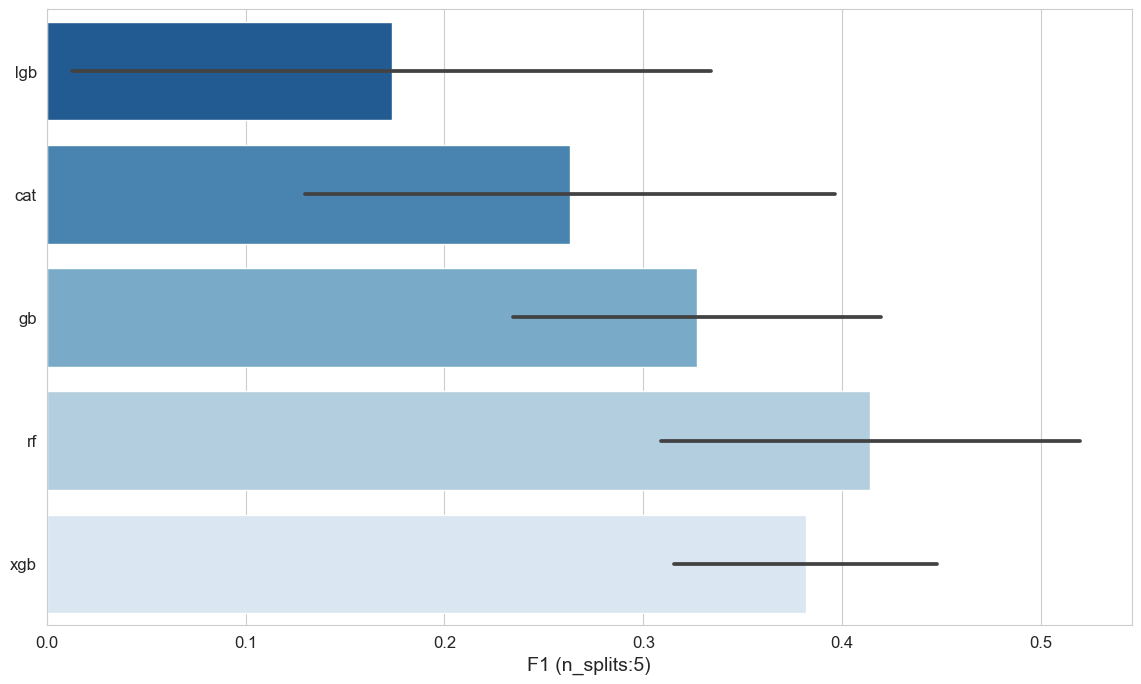

In [83]:
def plot_score_from_dict(score_dict, title='MAE', ascending=True):
    score_df = pd.melt(pd.DataFrame(score_dict))
    score_df = score_df.sort_values('value', ascending=ascending)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='value', y='variable', data=score_df, palette='Blues_r', errorbar='sd')
    plt.xlabel(f'{title}', fontsize=14)
    plt.ylabel('')
    #plt.title(f'{title}', fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='x')

    plt.show()

print('--- Mean F1 Scores---')    
for name, score in score_dict.items():
    mean_score = np.mean(score)
    std_score = np.std(score)
    print(f'{name}: {red}{mean_score:.5f} ± {std_score:.5f}{res}')
plot_score_from_dict(score_dict, title=f'F1 (n_splits:{n_splits})')

Mean Optuna Ensemble F1 0.44675 ± 0.03920

--- Optuna Weights---
xgb: 0.53672 ± 0.17706
lgb: 0.18984 ± 0.16888
cat: 0.29774 ± 0.21359
rf: 0.69336 ± 0.28082
gb: 0.45169 ± 0.19782


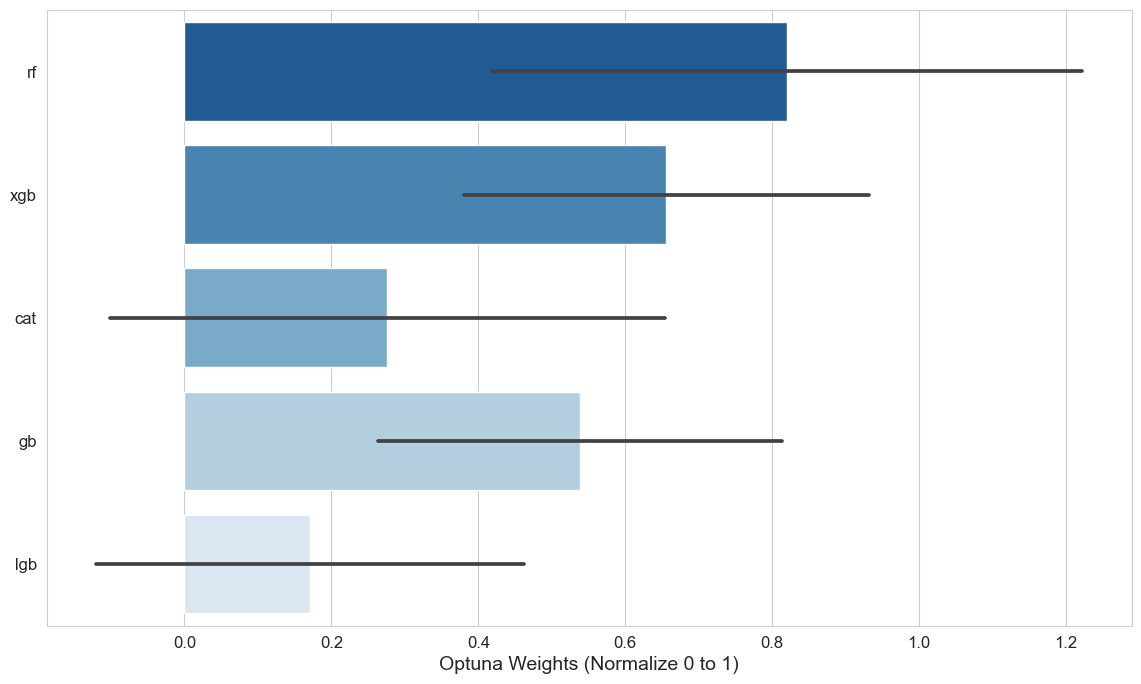

In [84]:
# Calculate the mean LogLoss score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'{red}Mean{res} Optuna Ensemble F1 {red}{mean_score:.5f} ± {std_score:.5f}{res}')

print('')
# Print the mean and standard deviation of the ensemble weights for each model
print('--- Optuna Weights---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {blu}{mean_weight:.5f} ± {std_weight:.5f}{res}')

# weight_dict = dict(zip(list(score_dict.keys()), np.array(weights).T.tolist()))
# plot_score_from_dict(weight_dict, title='Model Weights', ascending=False)
normalize = [((weight - np.min(weight)) / (np.max(weight) - np.min(weight))).tolist() for weight in weights]
weight_dict = dict(zip(list(score_dict.keys()), np.array(normalize).T.tolist()))
plot_score_from_dict(weight_dict, title='Optuna Weights (Normalize 0 to 1)', ascending=False)

In [ ]:
# Ensemble Mean F1 : 44322

# Compare Models

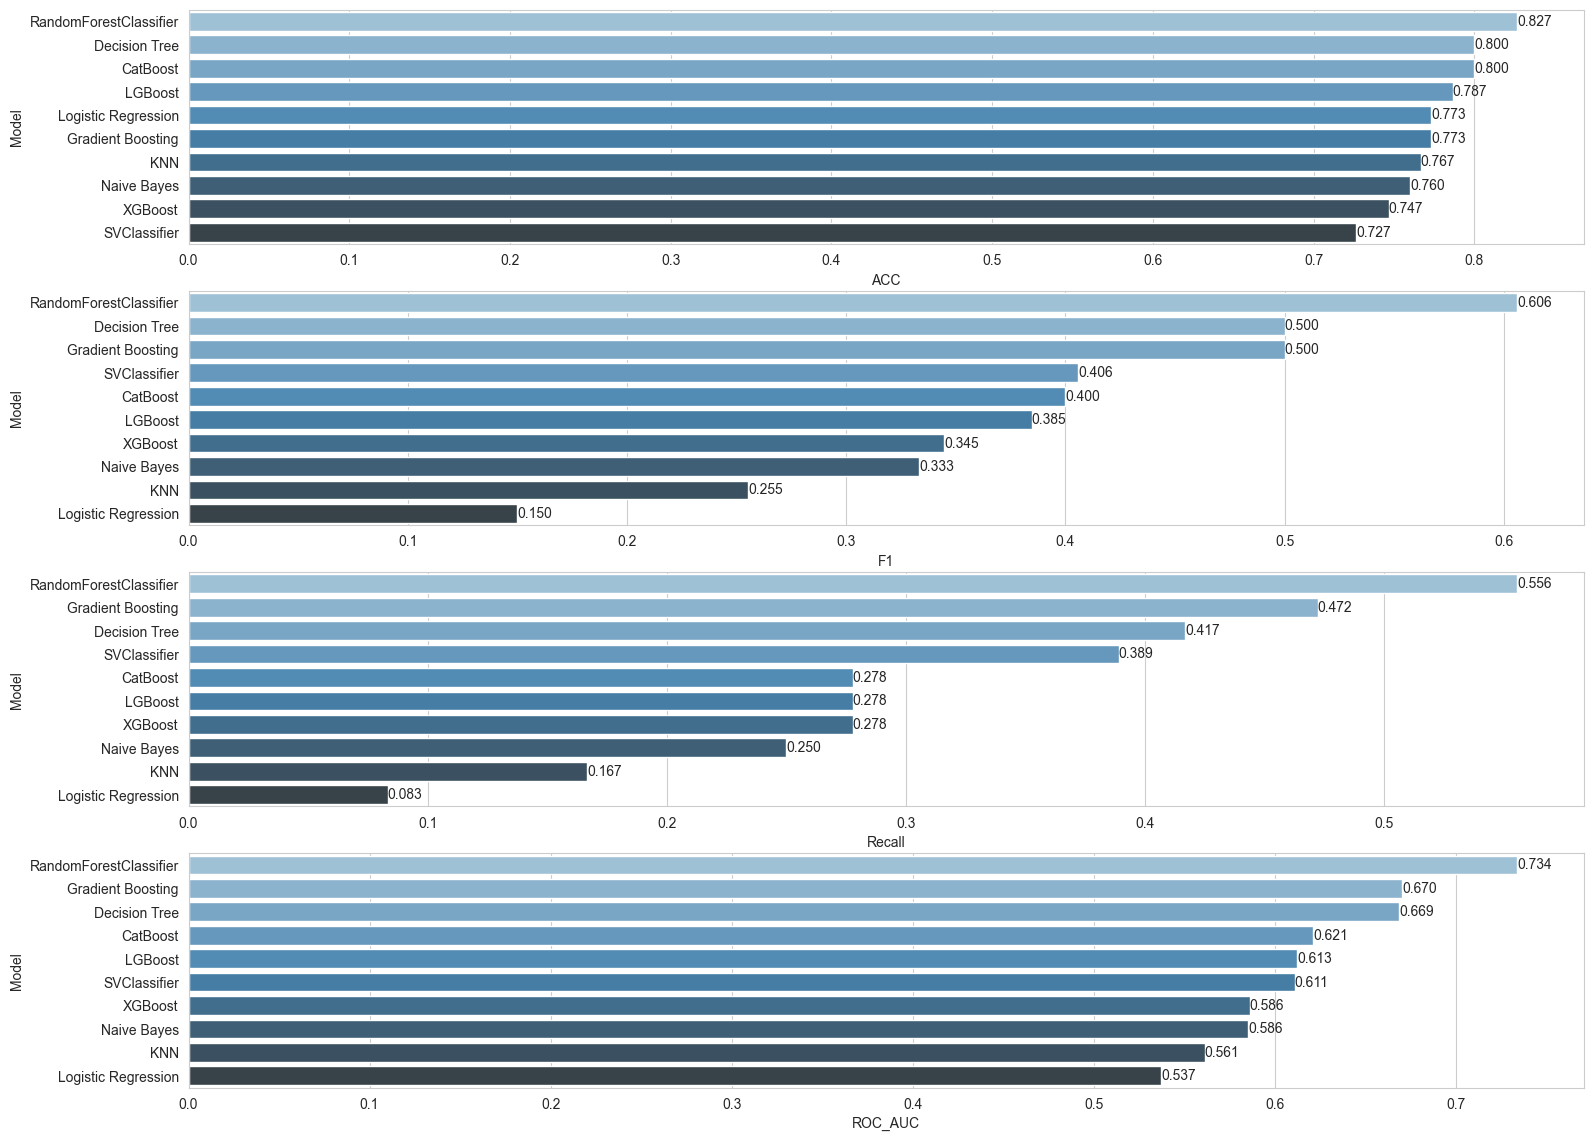

In [85]:
compare = pd.DataFrame({"Model": ["Naive Bayes", "Decision Tree", "KNN", "Logistic Regression", "SVClassifier", "RandomForestClassifier" ,"Gradient Boosting",
                                 "XGBoost", "LGBoost" , "CatBoost"],
                        "ACC": [nb_acc, dt_acc, knn_acc, log_acc, svc_acc, rf_acc, gb_acc, xgb_acc, lgb_acc, cb_acc],
                        "F1": [nb_f1, dt_f1, knn_f1, log_f1, svc_f1, rf_f1 , gb_f1, xgb_f1, lgb_f1 , cb_f1],
                        "Recall": [nb_recall, dt_recall, knn_recall, log_recall, svc_recall, rf_recall, gb_recall, xgb_recall, lgb_recall , cb_recall],
                        "ROC_AUC": [nb_rocauc, dt_rocauc, knn_rocauc, log_rocauc , svc_rocauc, rf_rocauc, gb_rocauc, xgb_rocauc, lgb_rocauc, cb_rocauc]
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(18,14))
plt.subplot(411)
compare = compare.sort_values(by="ACC", ascending=False)
ax=sns.barplot(x="ACC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# RandomForest Classifier best so far...

In [ ]:
# Done.